In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
movies = pd.read_csv("movies_metadata.csv", low_memory=False)  
ratings_small = pd.read_csv("ratings_small.csv")
credits = pd.read_csv("credits.csv")
keywords = pd.read_csv("keywords.csv")
links = pd.read_csv("links.csv")
links_small = pd.read_csv("links_small.csv")
ratings = pd.read_csv("ratings.csv")
#print(movies.columns)


### Zusammenhang zwischen Produktionsbudget und durchschnittlicher Bewertung von Filmen

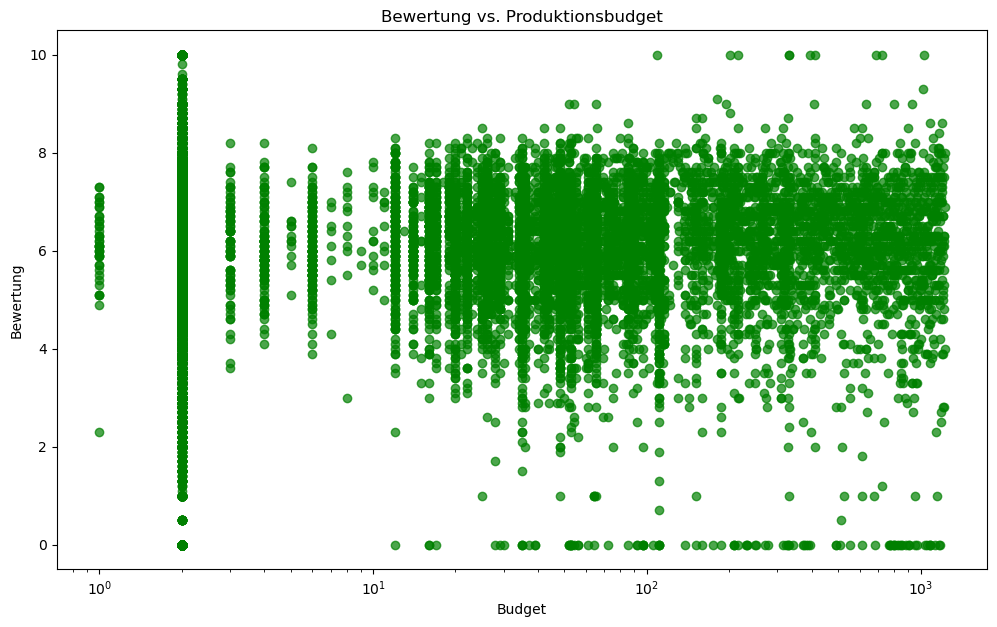

In [2]:
plt.figure(figsize=(12,7))
plt.scatter(movies['budget'], movies['vote_average'], alpha=0.7, color='green')
plt.title('Bewertung vs. Produktionsbudget')
plt.xlabel('Budget')
plt.ylabel('Bewertung')
plt.xscale('log')  # Logarithmische Skalierung für bessere Darstellung
plt.yscale('linear')
plt.show()

### Entwicklung der durchschnittlichen Filmbewertungen über die Jahre

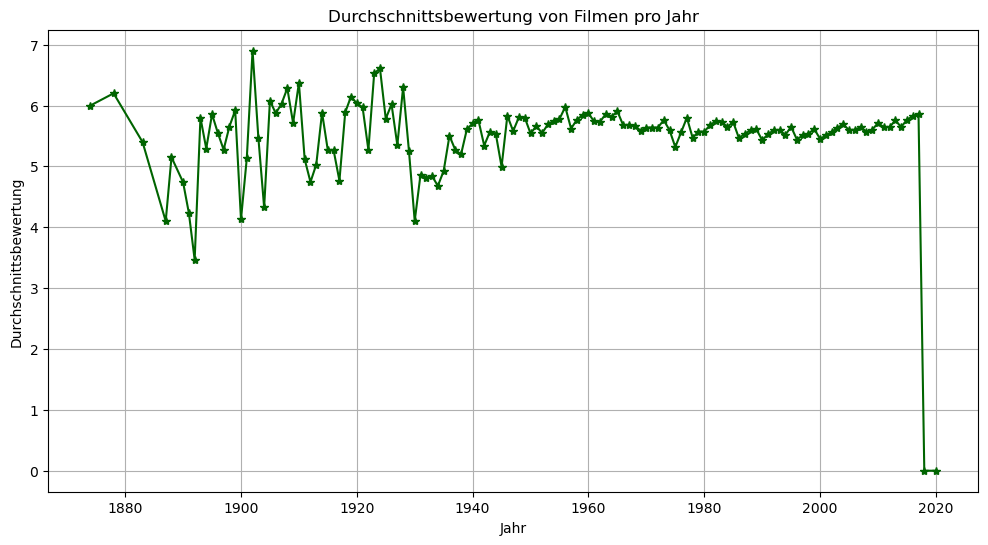

In [3]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['year'] = movies['release_date'].dt.year
avg_rating_per_year = movies.groupby('year')['vote_average'].mean()

# Liniendiagramm erstellen
plt.figure(figsize=(12, 6))
avg_rating_per_year.plot(kind='line', color='darkgreen', marker='*')
plt.title('Durchschnittsbewertung von Filmen pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittsbewertung')
plt.grid(True)
plt.show()

### Die 10 am höchsten bewerteten Filme basierend auf der durchschnittlichen Bewertung

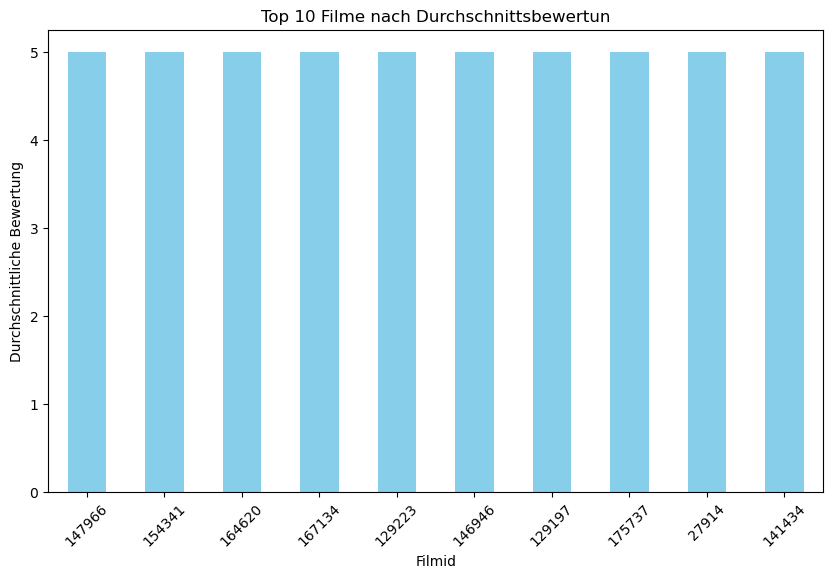

In [4]:
# Gruppiere die Filme nach ihrer durchschnittlichen Bewertung und plotiere sie
avg_ratings = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False)
top_avg_ratings = avg_ratings.head(10)  # Die 10 höchsten bewerteten Filme holen

# Balkendiagramm erstellen
plt.figure(figsize=(10,6))
top_avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Top 10 Filme nach Durchschnittsbewertun')
plt.xlabel('Filmid')
plt.ylabel('Durchschnittliche Bewertung')
plt.xticks(rotation=45)
plt.show()


## Line Chart
#### Entwicklung der durchschnittlichen Film-Bewertungen im Zeitverlauf

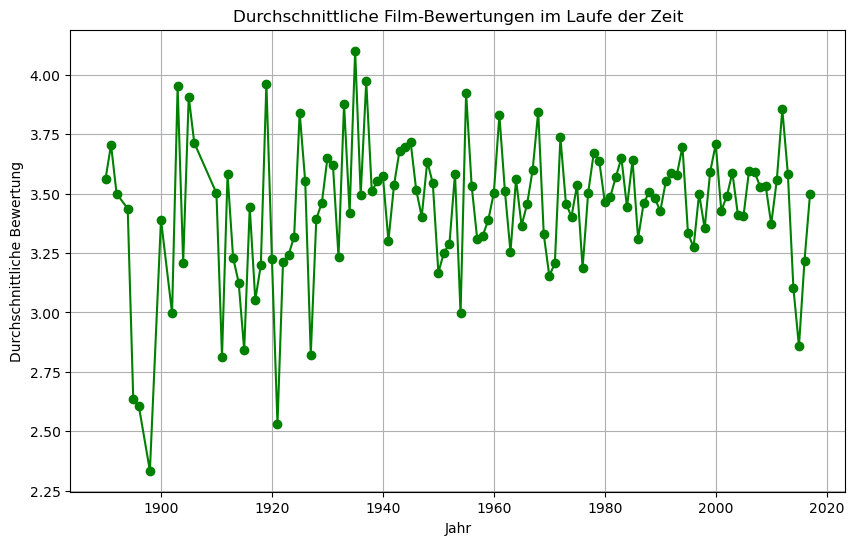

In [5]:
# Überprüfen auf nicht-numerische Werte in der 'id'-Spalte
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')  # Ungültige Werte werden in NaN umgewandelt

# Zeilen mit NaN-Werten in der 'id'-Spalte entfernen
movies = movies.dropna(subset=['id'])
movies['id'] = movies['id'].astype(int)
# Nun den Merge durchführen
movies_ratings = pd.merge(movies[['id', 'release_date']], ratings[['movieId', 'rating']], left_on='id', right_on='movieId')
movies_ratings['release_year'] = pd.to_datetime(movies_ratings['release_date']).dt.year
avg_ratings_yearly = movies_ratings.groupby('release_year')['rating'].mean()
# Liniendiagramm erstellen
plt.figure(figsize=(10,6))
avg_ratings_yearly.plot(kind='line', color='green', marker='o')
plt.title('Durchschnittliche Film-Bewertungen im Laufe der Zeit')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Bewertung')
plt.grid(True)
plt.show()


# Scatter Plot: 
### To visualize the relationship between budget (if available) and the ratings for movies.

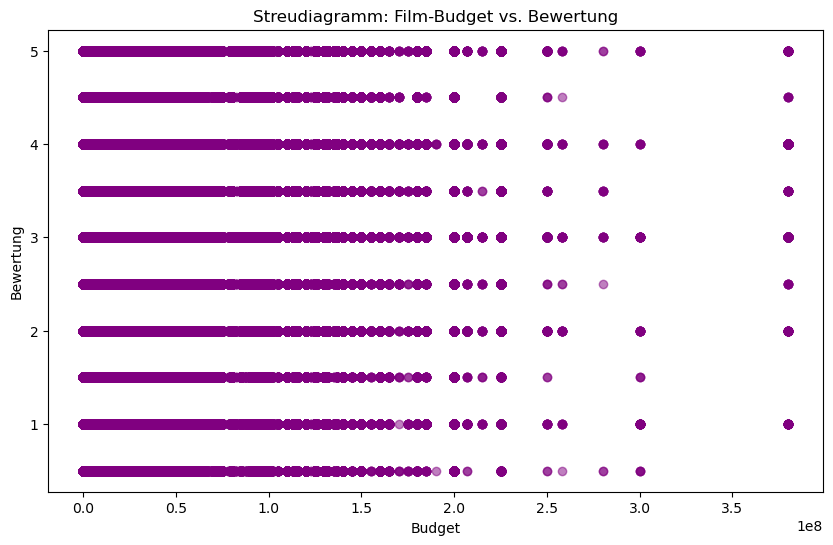

In [6]:
# Angenommen, wir haben Budget- und Bewertungsinformationen im 'movies'-Datensatz
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')  # Budget in numerisch umwandeln
movies_ratings = pd.merge(movies[['id', 'budget']], ratings[['movieId', 'rating']], left_on='id', right_on='movieId')
# Streudiagramm erstellen
plt.figure(figsize=(10,6))
plt.scatter(movies_ratings['budget'], movies_ratings['rating'], alpha=0.5, color='purple')
plt.title('Streudiagramm: Film-Budget vs. Bewertung')
plt.xlabel('Budget')
plt.ylabel('Bewertung')
plt.show()


DeltaGenerator()

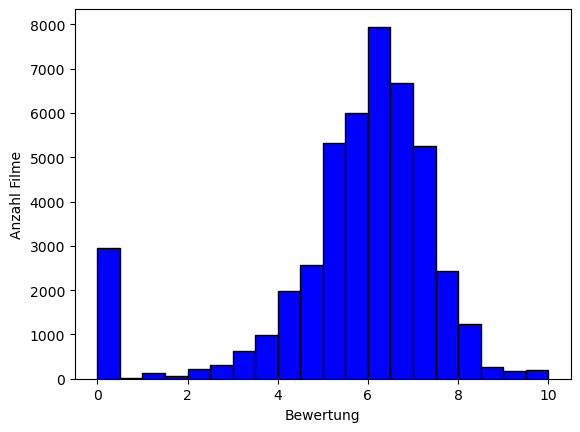

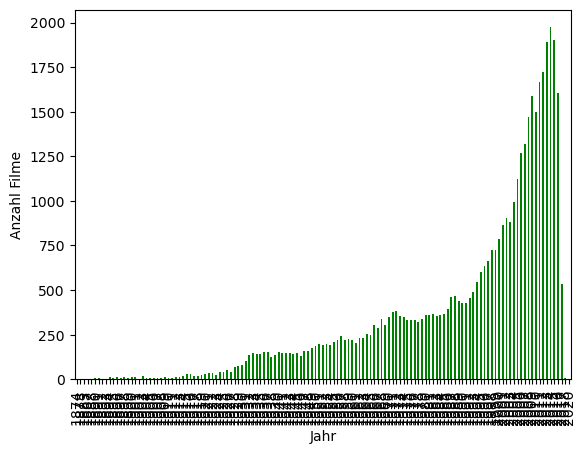

In [8]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
movies = pd.read_csv("movies_metadata.csv", low_memory=False)
ratings = pd.read_csv("ratings_small.csv")

# Relevante Spalten auswählen
movies = movies[['title', 'release_date', 'vote_average', 'vote_count', 'genres']]
movies = movies.dropna()
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies = movies.dropna()
movies['year'] = movies['release_date'].dt.year.astype('Int64')

# Streamlit UI
st.title("Filmdaten-Explorer")

# Filteroptionen
min_year, max_year = movies['year'].min(), movies['year'].max()
year_range = st.slider("Jahr auswählen:", int(min_year), int(max_year), (int(min_year), int(max_year)))

min_vote, max_vote = movies['vote_average'].min(), movies['vote_average'].max()
vote_range = st.slider("Bewertung eingrenzen:", float(min_vote), float(max_vote), (float(min_vote), float(max_vote)))

filtered_movies = movies[(movies['year'].between(*year_range)) & (movies['vote_average'].between(*vote_range))]

st.write(f"Gefundene Filme: {len(filtered_movies)}")
st.dataframe(filtered_movies)

# Visualisierung
st.subheader("Bewertungsverteilung")
fig, ax = plt.subplots()
ax.hist(filtered_movies['vote_average'].dropna(), bins=20, color='blue', edgecolor='black')
ax.set_xlabel("Bewertung")
ax.set_ylabel("Anzahl Filme")
st.pyplot(fig)

st.subheader("Anzahl der Filme pro Jahr")
fig, ax = plt.subplots()
filtered_movies['year'].value_counts().sort_index().plot(kind='bar', ax=ax, color='green')
ax.set_xlabel("Jahr")
ax.set_ylabel("Anzahl Filme")
st.pyplot(fig)
